## Coding Exercise #0403

### 1. Compare clustering algorithms:

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.spatial import distance_matrix
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

#### 1.1. Generate simulated data and visualize:

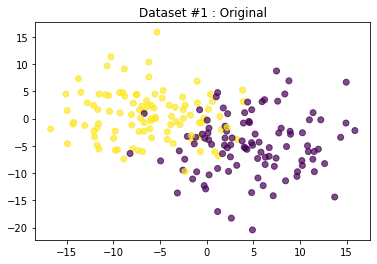

In [2]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

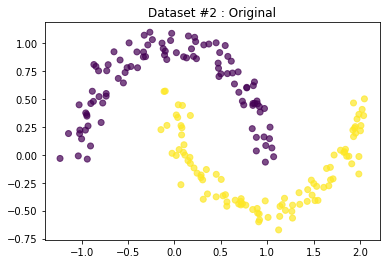

In [3]:
# Dataset #2.
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

#### 1.2. Apply k-means clustering and visualize:

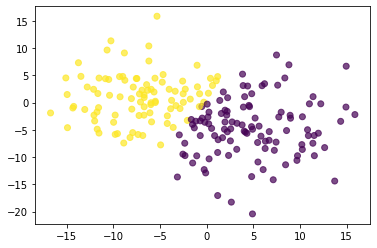

In [9]:
# Dataset #1 and two clusters.
kmeans=KMeans(n_clusters=2, random_state=123)               # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
#Fit the data                  # Unsupervised learning => Only X1.
model=kmeans.fit(X1)                                               
#Scatter plot to vizualise 
plt.scatter(X1[:,0],X1[:,1], c= kmeans.labels_, alpha=0.7 )

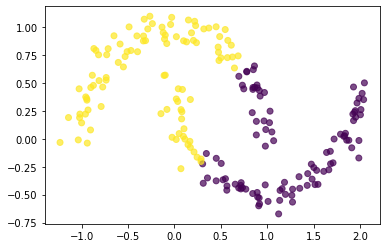

In [10]:
# Dataset #2 and two clusters.
kmeans = KMeans(n_clusters=2, random_state=123)                       # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
model=kmeans.fit(X2)                                               
#Scatter plot to vizualise 
plt.scatter(X2[:,0],X2[:,1], c= kmeans.labels_, alpha=0.7 )

#### 1.3. Apply agglomerative clustering and visualize:

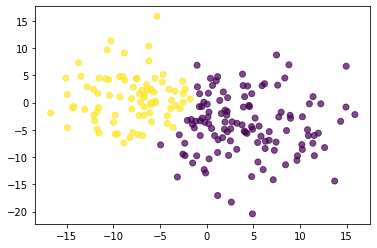

In [11]:
# Dataset #1 and two clusters.
agglomerative = AgglomerativeClustering(n_clusters=2)               # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
#Fit the data                  # Unsupervised learning => Only X1.
                                               
agg=agglomerative.fit(X1)

#Scatter plot to vizualise
plt.scatter(X1[:,0],X1[:,1], c= agglomerative.labels_, alpha=0.7 )

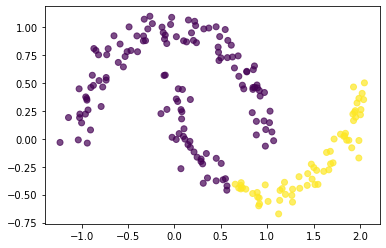

In [12]:
# Dataset #2 and two clusters.
agglomerative = AgglomerativeClustering(n_clusters=2)               # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
#Fit the data                  # Unsupervised learning => Only X1.
                                               
agg=agglomerative.fit(X2)

#Scatter plot to vizualise
plt.scatter(X2[:,0],X2[:,1], c= agglomerative.labels_, alpha=0.7 )

#### 1.4. Apply hierarchical clustering and visualize: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


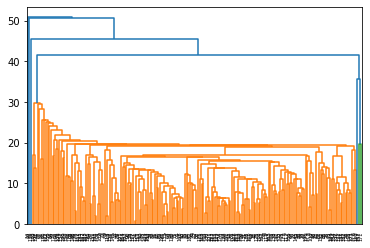

In [15]:
# Dataset #1 and show dendrogram.
myLinkage = linkage(distance_matrix(X1,X1),'single')                        # Cluster hierarchically using single linkage.


#Dendogram 
dendo=dendrogram(myLinkage)


In [16]:
# Dataset #1 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 5, criterion='distance')                      #  Cut at the height (distance) = 5 <= change this value at will.
pd.Series(labels).value_counts()

94     3
49     2
84     2
146    2
24     2
      ..
30     1
167    1
51     1
87     1
11     1
Length: 178, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


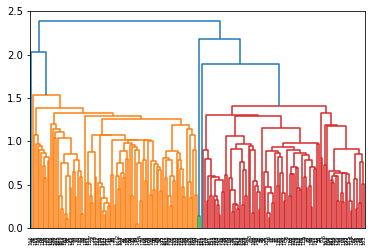

In [17]:
# Dataset #2 and show dendrogram.
myLinkage = linkage(distance_matrix(X2,X2),'single')                        # Cluster hierarchically using single linkage.


#Dendogram 
dendo=dendrogram(myLinkage)

In [18]:
# Dataset #2 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 0.23, criterion='distance')                      #  Cut at the height (distance) = 0.23 <= change this value at will.
pd.Series(labels).value_counts()

15     3
125    3
34     3
99     2
119    2
      ..
150    1
19     1
146    1
66     1
182    1
Length: 183, dtype: int64

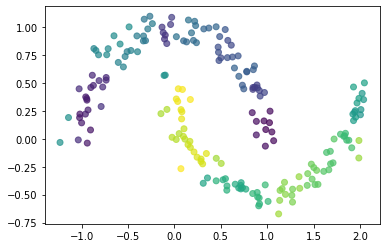

In [19]:
#Scatter plot 
plt.scatter(X2[:,0],X2[:,1], c=labels, alpha=0.7)

#### 1.5. Apply DBSCAN and visualize: 

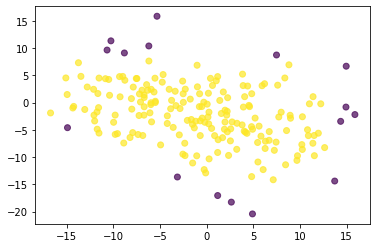

In [20]:
# Dataset #1. with eps 3 and min_sample 5 (explain them)
dbscan = DBSCAN(eps=3, min_samples=5)

#Fit the data
dbscan.fit(X1)

#Scatter plot
plt.scatter(X1[:,0],X1[:,1], c=dbscan.labels_, alpha=0.7)

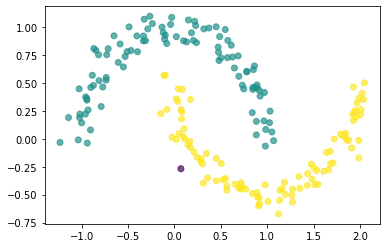

In [22]:
# Dataset #2. with eps 0.2 and min_sample 5 (explain them)
dbscan = DBSCAN(eps=0.2, min_samples=5)

#Fit the data
dbscan.fit(X2)

#Scatter plot
plt.scatter(X2[:,0],X2[:,1], c=dbscan.labels_, alpha=0.7)

NOTE: Let's discuss the result of the different clustering algorithms.